**Assignment Lab 1**

Neural Networks Using Pima Dataset


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import numpy as np
import seaborn as sns
import pydot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load the Dataset

In [2]:
dataset = pd.read_csv('/content/pima-indians-diabetes.csv')
dataset.head()



,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


Explore the data

In [3]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
6,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
148,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
72,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
35,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
0,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
33.6,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
0.627,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
50,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
1,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


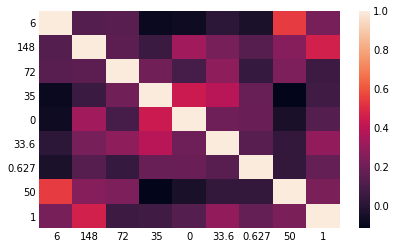

In [4]:
sns.heatmap(dataset.corr())

In [5]:
dataset.corr()

,6,148,72,35,0,33.6,0.627,50,1
6,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
148,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
72,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
35,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
0,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
33.6,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
0.627,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
50,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
1,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


Training and Testing the data

In [6]:
#separating the data
x_data=dataset.iloc[:,0:8].values
y_data=dataset.iloc[:,8:].values
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=10)

Creating the Model

In [7]:
def model_creation(opt='adam',init='uniform'):
    model=Sequential()
    model.add(Dense(12,input_dim=8,kernel_initializer=init,activation='relu'))
    model.add(Dense(8,kernel_initializer=init,activation='relu'))
    model.add(Dense(8,kernel_initializer=init,activation='relu'))
    model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

model=model_creation()

Traing the model

In [9]:
values=model.fit(x_train,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
58/58 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8330
Epoch 2/100
58/58 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8191
Epoch 3/100
58/58 [==============================] - 0s 996us/step - loss: 0.3777 - accuracy: 0.8313
Epoch 4/100
58/58 [==============================] - 0s 963us/step - loss: 0.3839 - accuracy: 0.8313
Epoch 5/100
58/58 [==============================] - 0s 968us/step - loss: 0.3716 - accuracy: 0.8296
Epoch 6/100
58/58 [==============================] - 0s 965us/step - loss: 0.3736 - accuracy: 0.8278
Epoch 7/100
58/58 [==============================] - 0s 895us/step - loss: 0.3706 - accuracy: 0.8435
Epoch 8/100
58/58 [==============================] - 0s 973us/step - loss: 0.3742 - accuracy: 0.8278
Epoch 9/100
58/58 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8313
Epoch 10/100
58/58 [==============================] - 0s 937us/step - loss: 0.3825 - accuracy: 0.

Prediction 

In [10]:
scores=model.evaluate(x_data,y_data)
print(model.metrics_names[1],scores[1]*100)

24/24 [==============================] - 0s 905us/step - loss: 0.4210 - accuracy: 0.8096
accuracy 80.96479773521423


In [12]:
y_predict=model.predict(x_test,batch_size=10)
y_predicted_labes=[]

#changing outputs in the last layer in network
for i in range(len(y_predict)):
    if y_predict[i]>=0.5:
        y_predicted_labes.append(1)
    else:
        y_predicted_labes.append(0)

Analysing the result

In [13]:
print(confusion_matrix(y_test,y_predicted_labes))
print(classification_report(y_test,y_predicted_labes))

[[103  25]
 [ 32  32]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       128
           1       0.56      0.50      0.53        64

    accuracy                           0.70       192
   macro avg       0.66      0.65      0.66       192
weighted avg       0.70      0.70      0.70       192

